In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score

import torch
from torch import nn

In [2]:
df = pd.read_csv('../data/ConcreteStrengthData.csv')
df

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
df.columns = df.columns.str.strip()

In [4]:
df.duplicated().sum()

25

In [5]:
df = df.drop_duplicates().reset_index(drop=True)

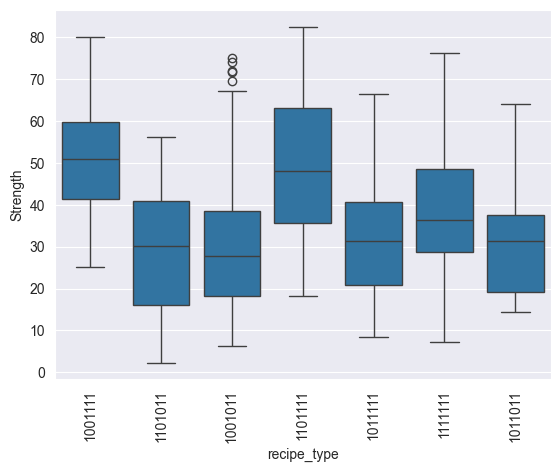

In [6]:
# Список компонентів
components = [
    'CementComponent',
    'BlastFurnaceSlag',
    'FlyAshComponent',
    'WaterComponent',
    'SuperplasticizerComponent',
    'CoarseAggregateComponent',
    'FineAggregateComponent',
]
# Побітова маска: 1 якщо > 0
binary_matrix = df[components].gt(0).astype(int)
# Створюємо строковий рецепт (наприклад "1011101")
df["recipe_type"] = binary_matrix.astype(str).agg("".join, axis=1)
# Кількість компонентів
# df["components_count"] = binary_matrix.sum(axis=1)
sns.boxplot(data=df, x="recipe_type", y="Strength")
plt.xticks(rotation=90)
plt.show()

In [7]:
# Кодуємо рецепт як фічі
# dummies = pd.get_dummies(df["recipe_type"], prefix="recipe", dtype=int)
# df = pd.concat([df, dummies], axis=1)
df.drop("recipe_type", axis=1, inplace=True)
df

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [8]:
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
CementComponent,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
BlastFurnaceSlag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
FlyAshComponent,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
WaterComponent,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
SuperplasticizerComponent,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
CoarseAggregateComponent,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
FineAggregateComponent,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
AgeInDays,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
Strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


In [9]:
# Bin concrete strength into 3 levels
# df["strength_level"] = pd.qcut(df["Strength"], q=3, labels=["low", "medium", "high"])
# # Pair plot with categorical hue
# sns.pairplot(df, hue="strength_level")

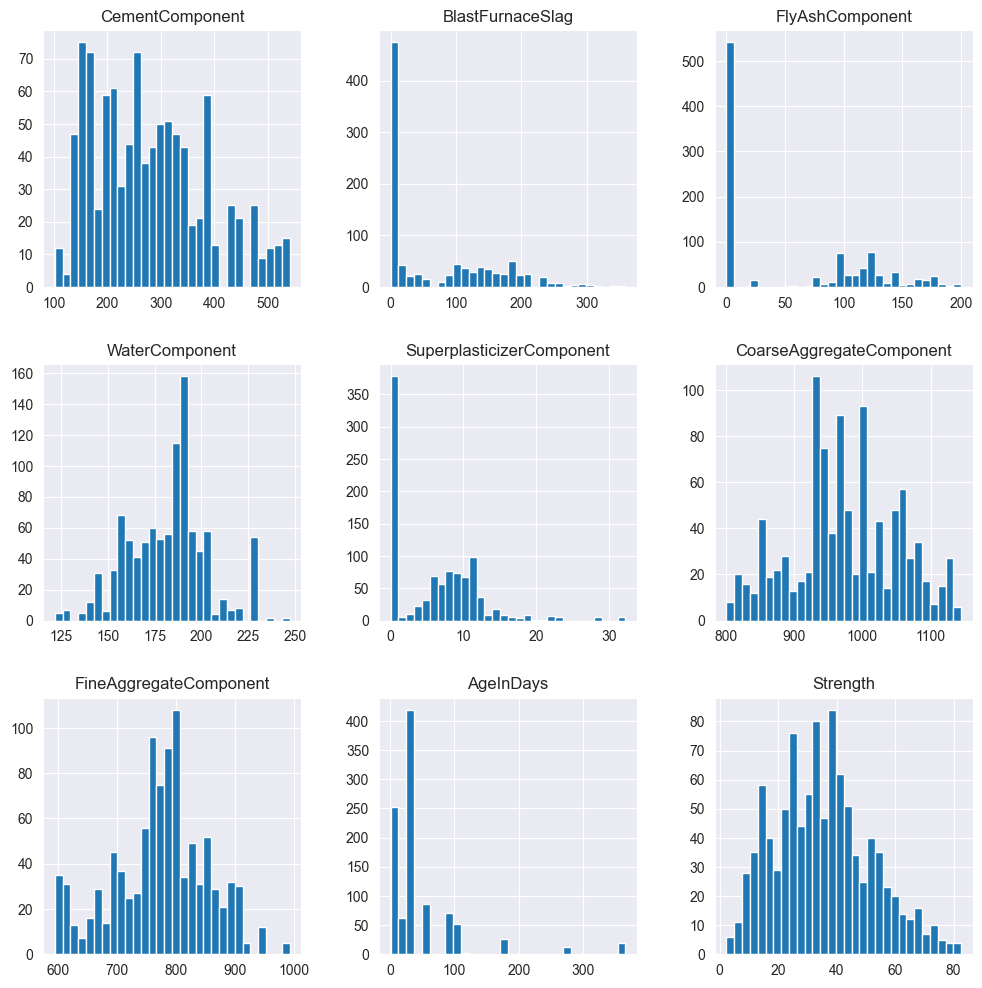

In [10]:
df.hist(bins=30, figsize=(12, 12))
plt.show()

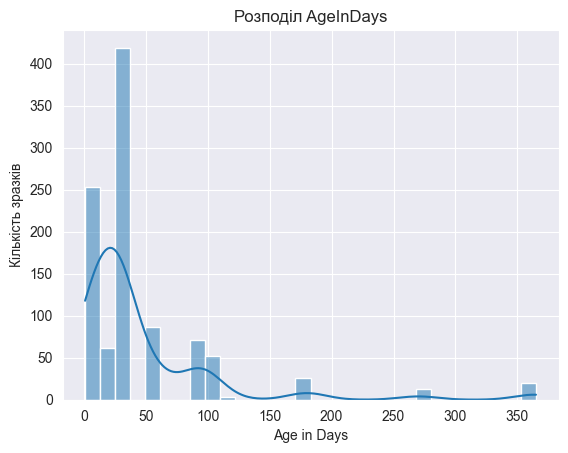

In [11]:
sns.histplot(df["AgeInDays"], bins=30, kde=True)
plt.title("Розподіл AgeInDays")
plt.xlabel("Age in Days")
plt.ylabel("Кількість зразків")
plt.show()

In [12]:
# # df["AgeInDays_log"] = np.log1p(df["AgeInDays"])
# df["AgeInDays_clipped"] = df["AgeInDays"].clip(upper=150)
# # sns.histplot(df["AgeInDays_log"], bins=30, kde=True)
# sns.histplot(df["AgeInDays_clipped"], bins=30, kde=True)
# # plt.title("Розподіл AgeInDays log")
# plt.title("Розподіл AgeInDays clipped")
# # plt.xlabel("Age in Days log")
# plt.xlabel("Age in Days clipped")
# plt.ylabel("Кількість зразків")
# plt.show()
# df.drop('AgeInDays', axis=1, inplace=True)

In [13]:
X = df.drop('Strength', axis=1)
y = df['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [15]:
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

In [16]:
class FlexibleNN(nn.Module):
    def __init__(self, input_size, layer_sizes, activations):
        """
        :param input_size: кількість входів
        :param layer_sizes: список розмірів шарів, напр. [64, 32, 16, 1]
        :param activations: список функцій активацій, напр. [ReLU, ReLU, ReLU, None], останній елемент завжди None
        """
        super().__init__()
        self.layers = nn.ModuleList()
        self.activations = activations

        current_size = input_size
        for size in layer_sizes:
            self.layers.append(nn.Linear(current_size, size))
            current_size = size


    def forward(self, x):
        for layer, activation in zip(self.layers, self.activations):
            x = layer(x)
            if activation:
                x = activation(x)

        return x


In [17]:
def run_experiment(input_size,
                   layer_sizes,
                   activations,
                   optimizer_class,
                   loss_fn_class,
                   lr=0.001,
                   num_epochs=1000,
                   verbose=False,
                   plot=True):

    model = FlexibleNN(input_size, layer_sizes, activations)
    criterion = loss_fn_class()
    optimizer = optimizer_class(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        y_pred_train = model(X_train_tensor)
        loss_train = criterion(y_pred_train, y_train_tensor)
        loss_train.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            y_pred_test = model(X_test_tensor)
            loss_test = criterion(y_pred_test, y_test_tensor)

        train_losses.append(loss_train.item())
        test_losses.append(loss_test.item())

        if verbose and (epoch + 1) % 500 == 0:
            print(f"[{epoch+1}/{num_epochs}] Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

    # Підсумкова оцінка
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
        y_pred_train = model(X_train_tensor)

    y_pred_test_np = y_pred_test.numpy()
    y_pred_train_np = y_pred_train.numpy()
    y_test_np = y_test_tensor.numpy()
    y_train_np = y_train_tensor.numpy()

    if plot:
        print("R2 Score: %.3f" % r2_score(y_test_np, y_pred_test_np))
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Графік втрат (Loss per epoch)
        axes[0].plot(train_losses, label="Train Loss")
        axes[0].plot(test_losses, label="Test Loss")
        axes[0].set_xlabel("Epoch")
        axes[0].set_ylabel("Loss")
        axes[0].set_title("Loss per epoch")
        axes[0].legend()
        axes[0].grid(True)

        # Графік передбачення (Prediction vs Actual)
        axes[1].scatter(y_test_np, y_pred_test_np, alpha=0.5)
        axes[1].plot(
            [y_test_np.min(), y_test_np.max()],
            [y_test_np.min(), y_test_np.max()],
            'r--'
        )
        axes[1].set_xlabel("True Strength")
        axes[1].set_ylabel("Predicted Strength")
        axes[1].set_title("Prediction vs Actual")
        axes[1].grid(True)
        axes[1].axis("equal")

        plt.tight_layout()
        plt.show()

    return {
        "layers": layer_sizes,
        "activations": [type(a).__name__ if a else None for a in activations],
        "optimizer": optimizer_class.__name__,
        "loss_fn": loss_fn_class.__name__,
        "mse": mse(y_test_np, y_pred_test_np),
        "mae": mae(y_test_np, y_pred_test_np),
        "r2": r2_score(y_test_np, y_pred_test_np),
        "train_r2": r2_score(y_train_np, y_pred_train_np)
    }

Experiment: [64, 1] + Adam + MSELoss
R2 Score: 0.540


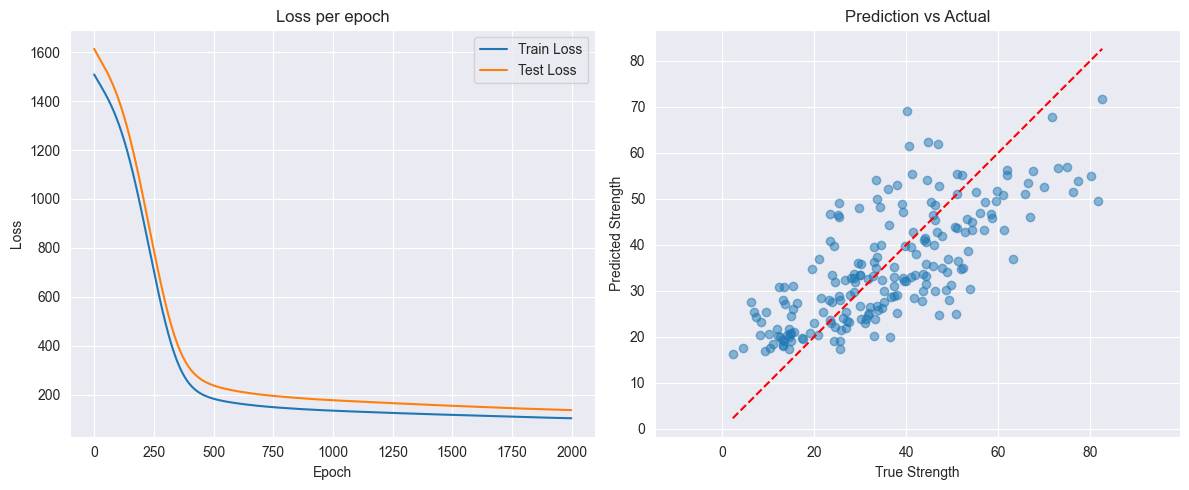

Experiment: [64, 1] + Adam + SmoothL1Loss
R2 Score: 0.650


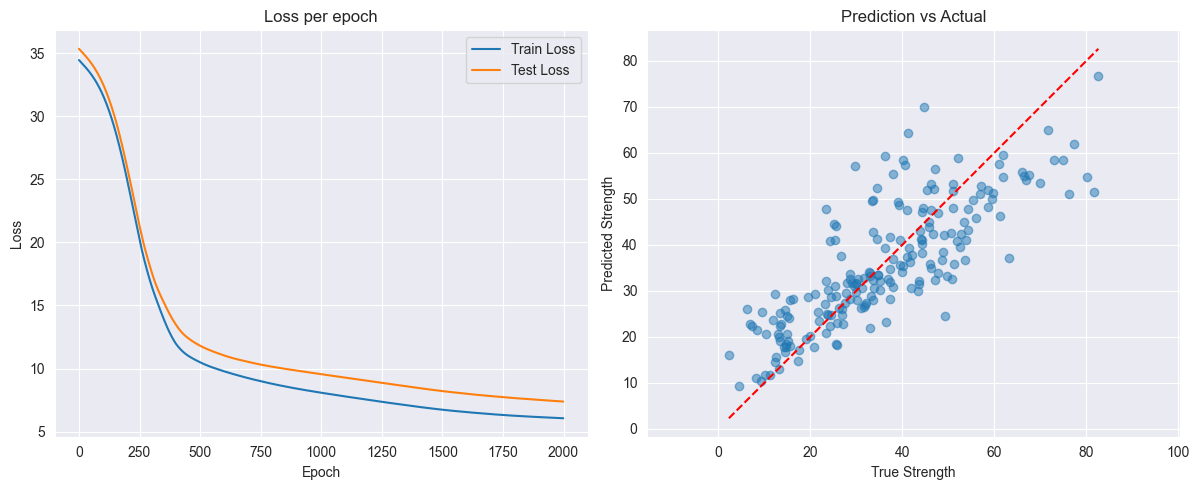

Experiment: [64, 1] + SGD + MSELoss
R2 Score: 0.811


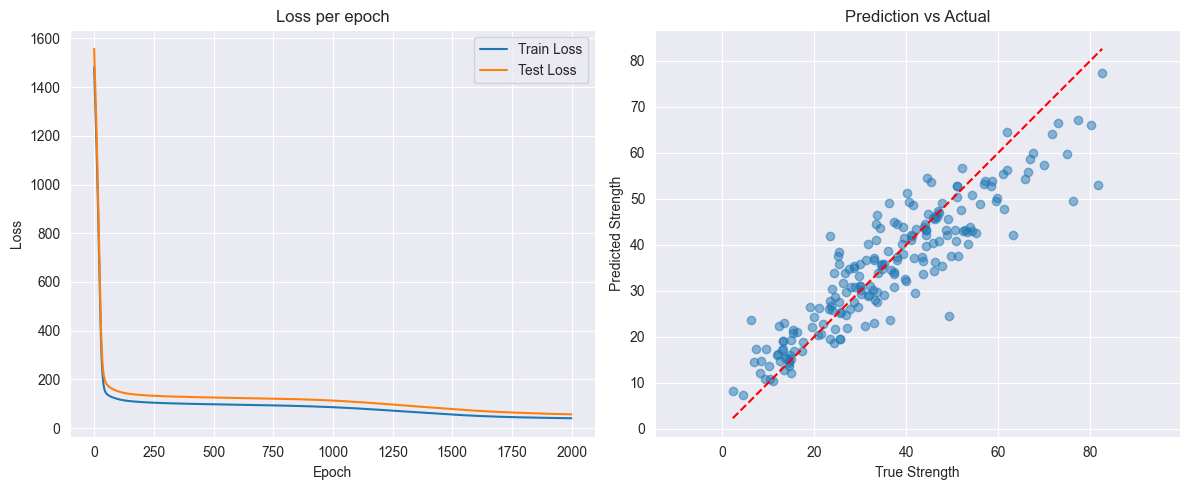

Experiment: [64, 1] + SGD + SmoothL1Loss
R2 Score: -0.344


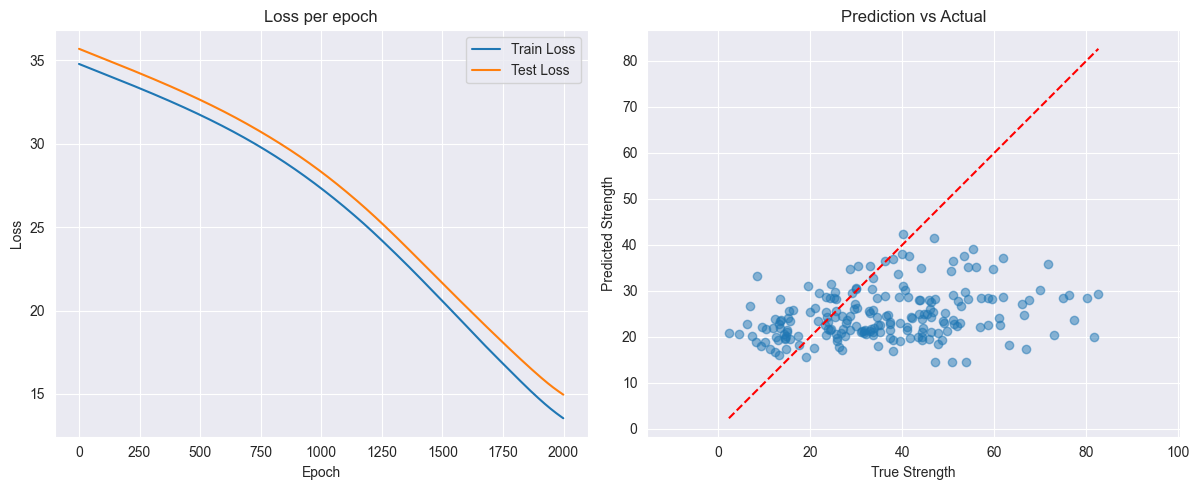

Experiment: [32, 16, 1] + Adam + MSELoss
R2 Score: 0.832


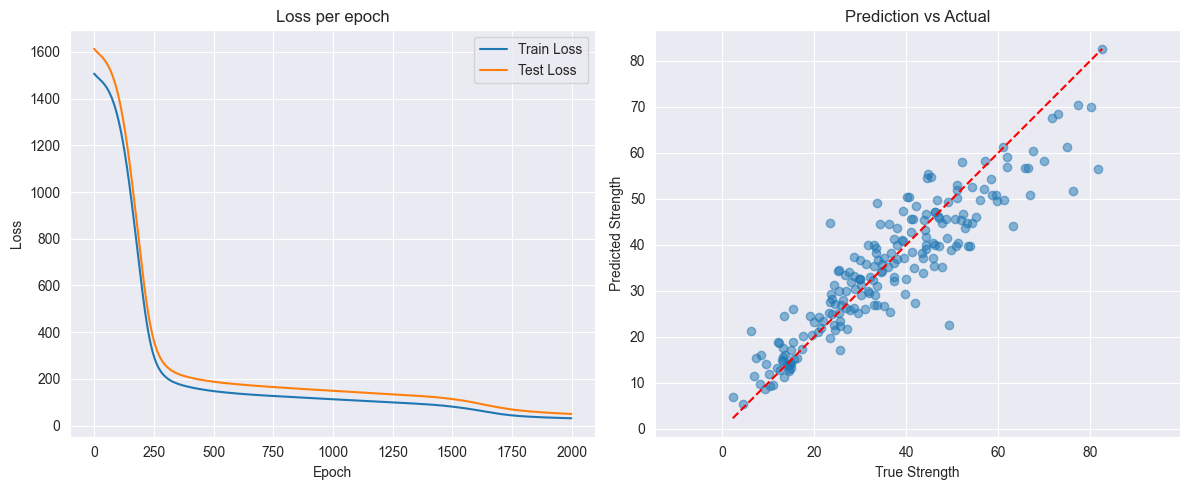

Experiment: [32, 16, 1] + Adam + SmoothL1Loss
R2 Score: 0.864


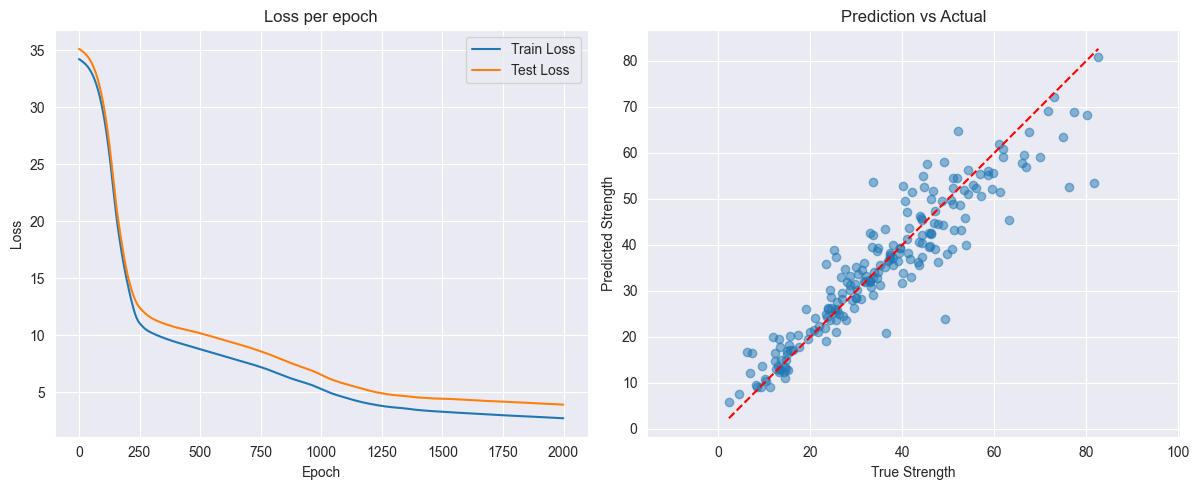

Experiment: [32, 16, 1] + SGD + MSELoss
R2 Score: 0.859


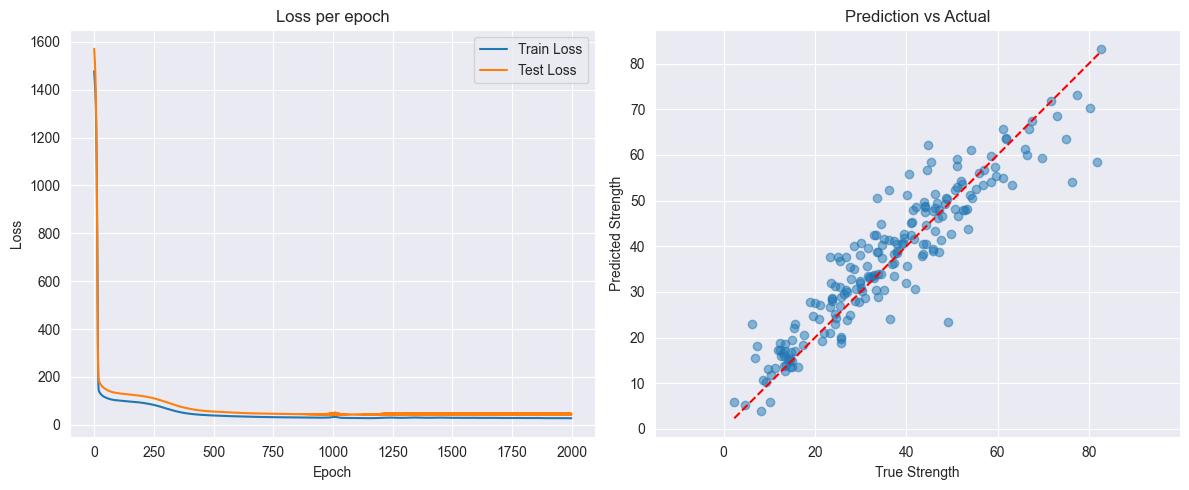

Experiment: [32, 16, 1] + SGD + SmoothL1Loss
R2 Score: 0.438


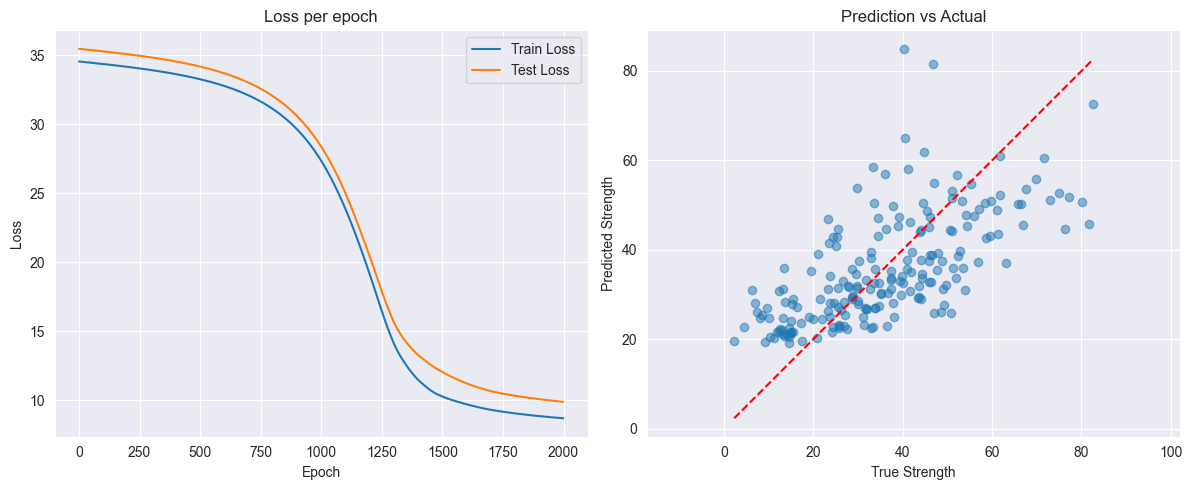

Experiment: [32, 16, 1] + Adam + MSELoss
R2 Score: 0.878


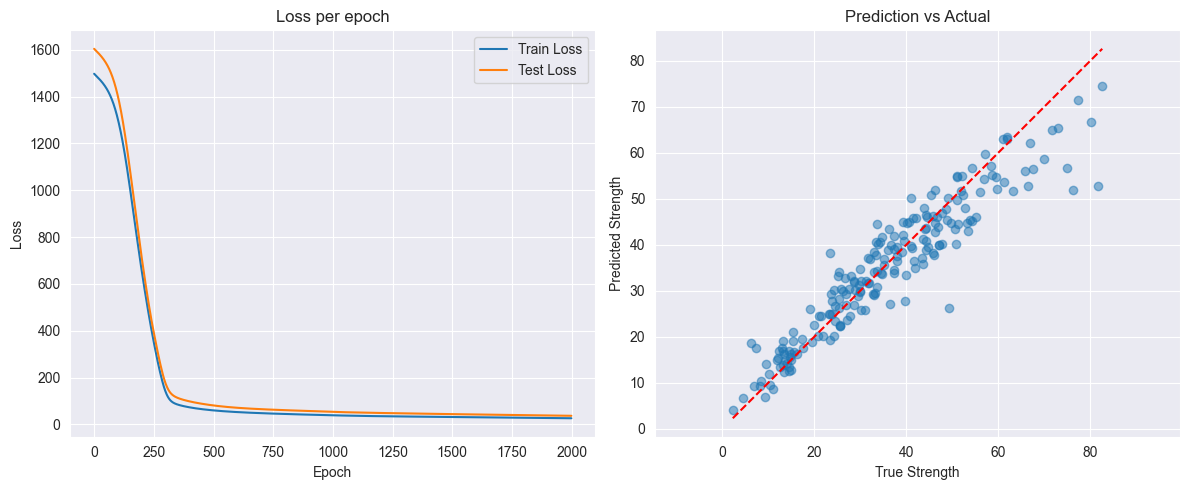

Experiment: [32, 16, 1] + Adam + SmoothL1Loss
R2 Score: 0.858


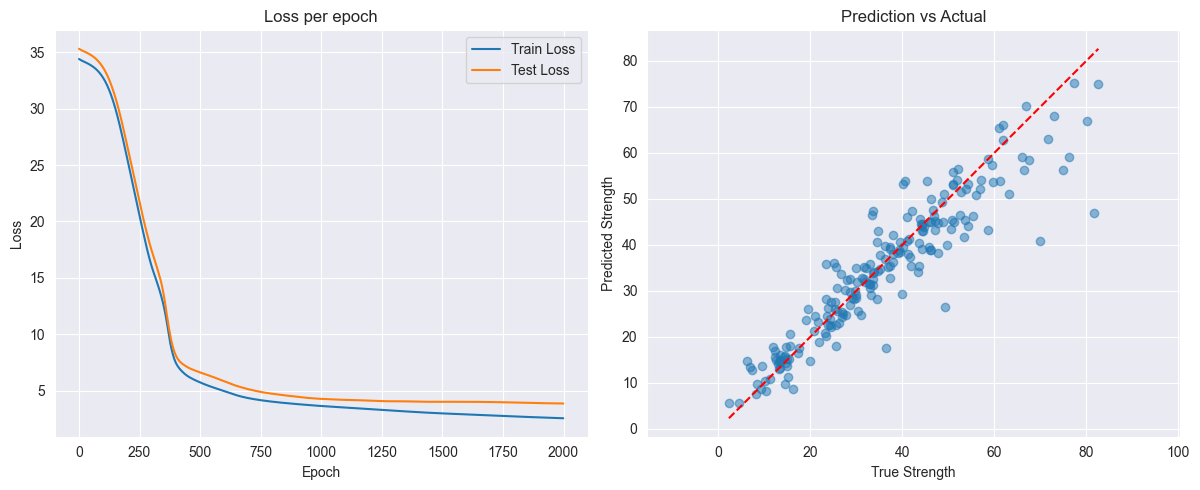

Experiment: [32, 16, 1] + SGD + MSELoss
R2 Score: 0.895


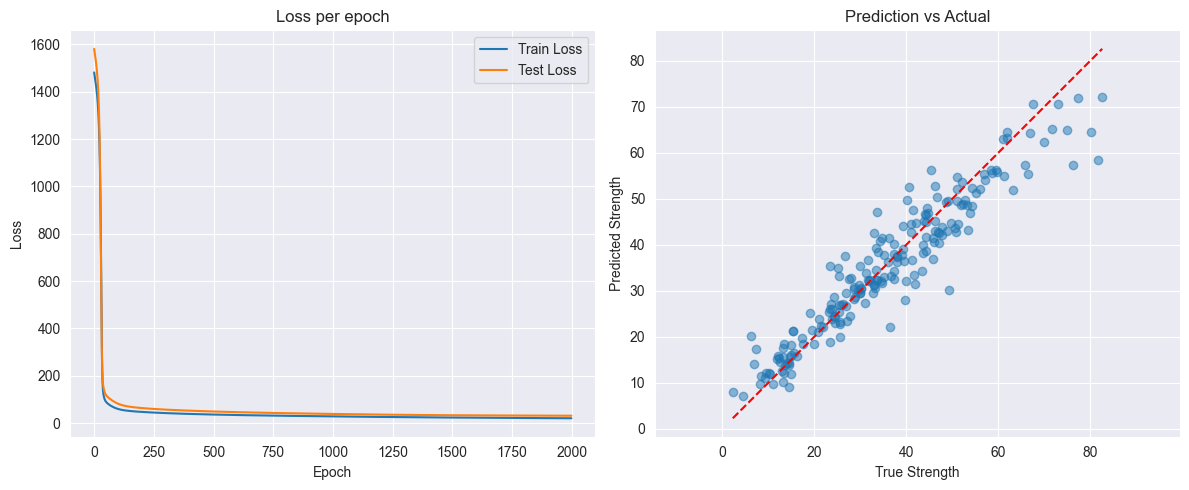

Experiment: [32, 16, 1] + SGD + SmoothL1Loss
R2 Score: 0.364


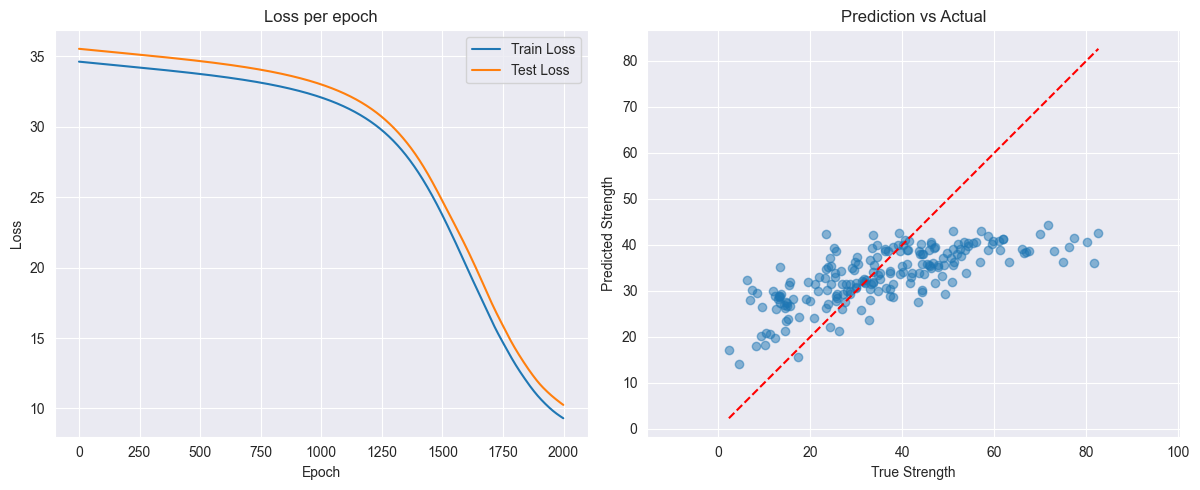

Experiment: [64, 32, 1] + Adam + MSELoss
R2 Score: 0.868


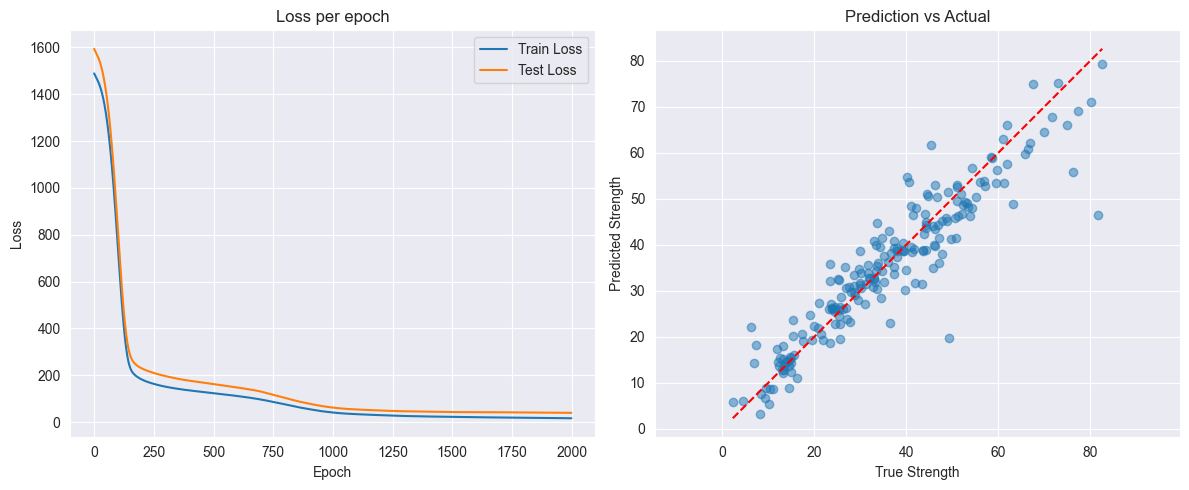

Experiment: [64, 32, 1] + Adam + SmoothL1Loss
R2 Score: 0.904


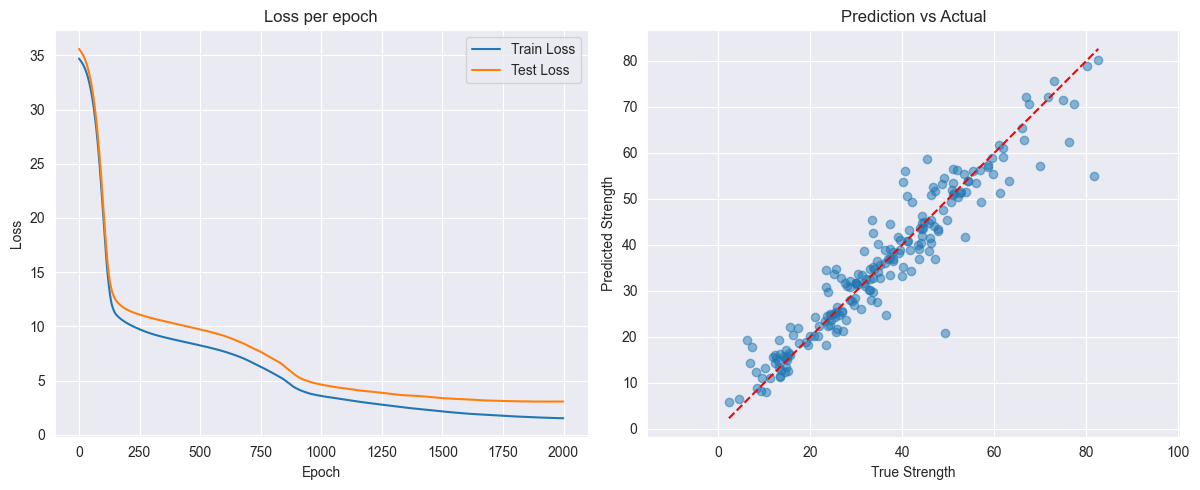

Experiment: [64, 32, 1] + SGD + MSELoss
R2 Score: 0.870


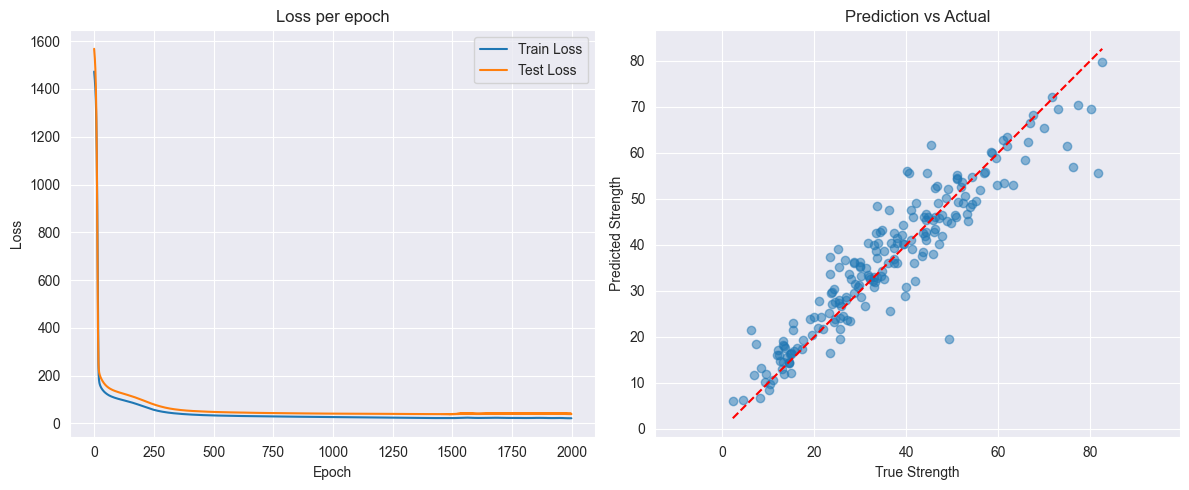

Experiment: [64, 32, 1] + SGD + SmoothL1Loss
R2 Score: 0.416


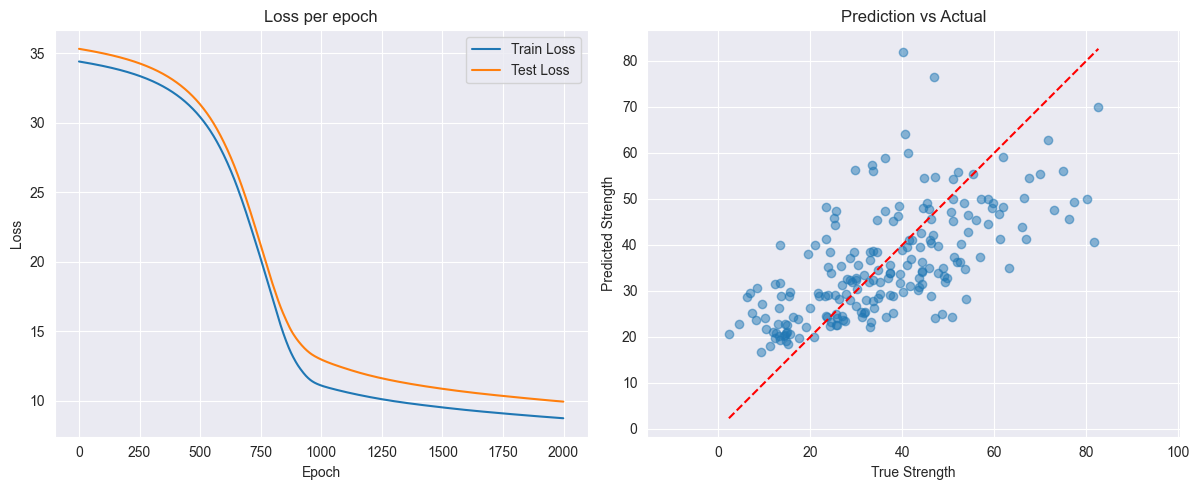

Experiment: [64, 32, 1] + Adam + MSELoss
R2 Score: 0.884


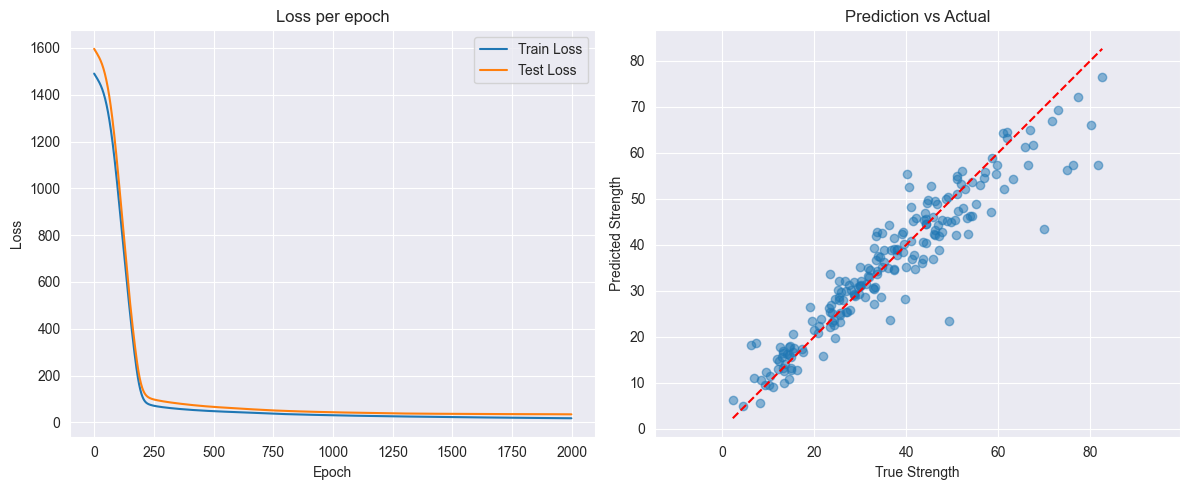

Experiment: [64, 32, 1] + Adam + SmoothL1Loss
R2 Score: 0.880


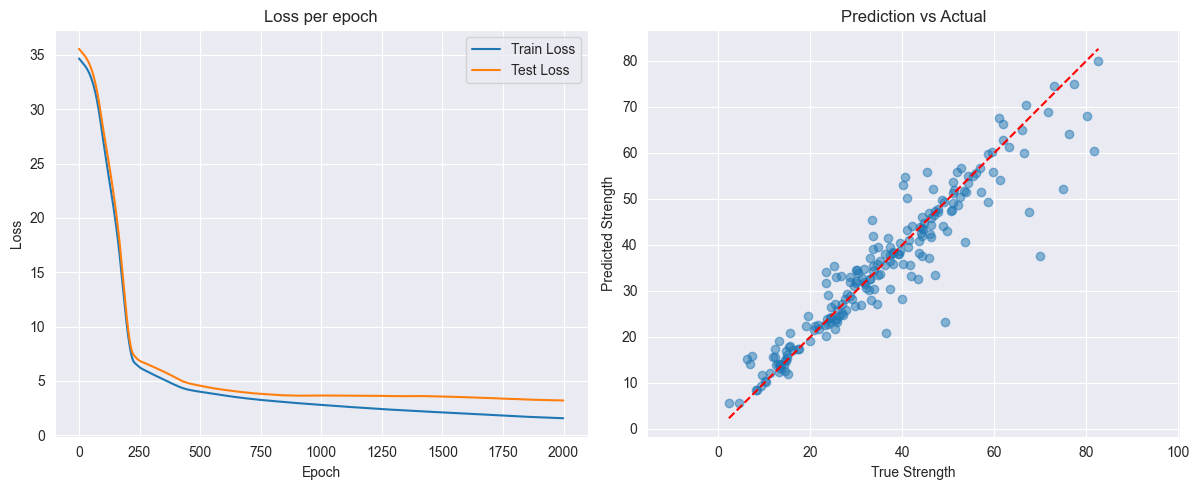

Experiment: [64, 32, 1] + SGD + MSELoss
R2 Score: 0.890


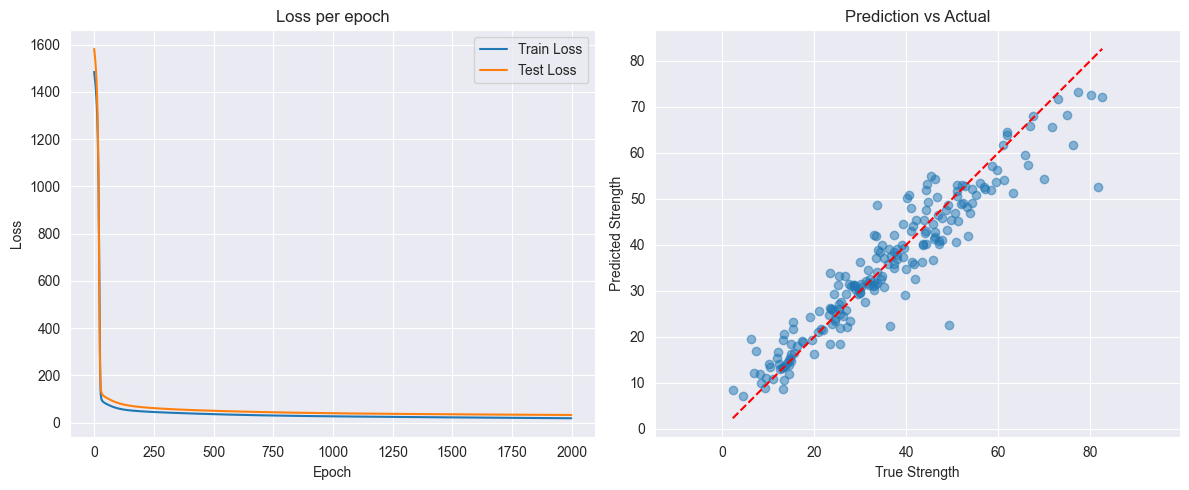

Experiment: [64, 32, 1] + SGD + SmoothL1Loss
R2 Score: 0.618


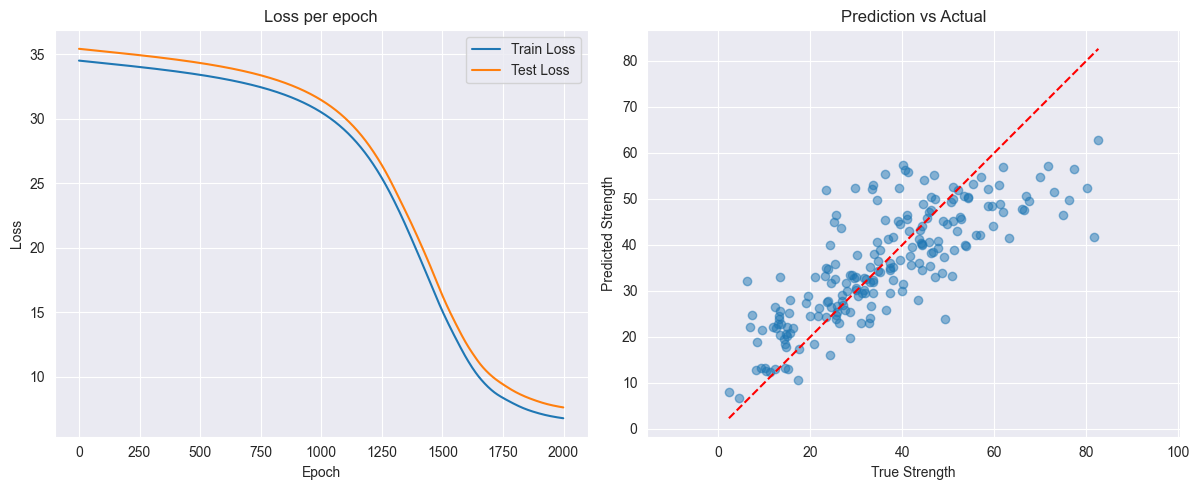

Experiment: [128, 64, 32, 1] + Adam + MSELoss
R2 Score: 0.913


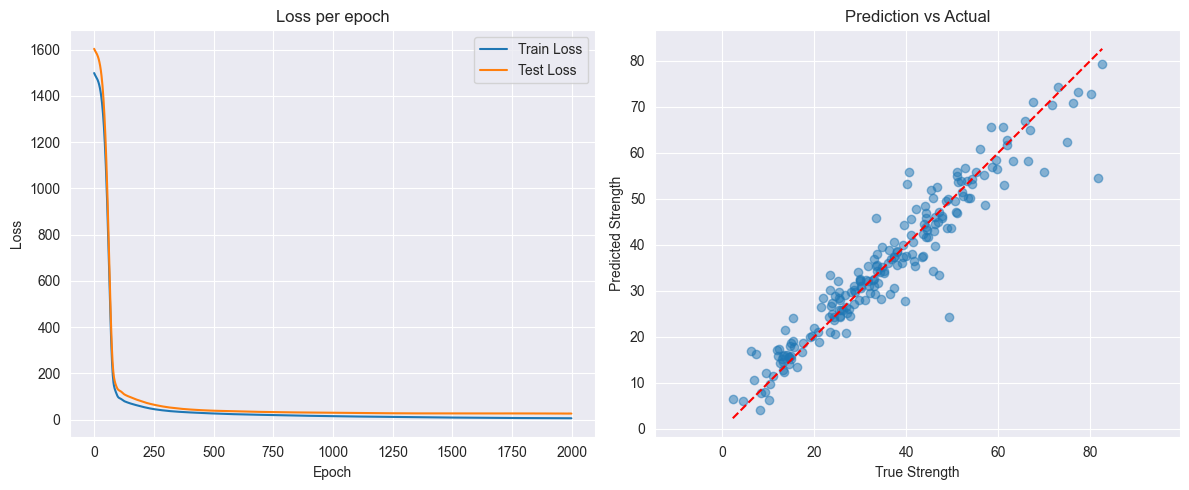

Experiment: [128, 64, 32, 1] + Adam + SmoothL1Loss
R2 Score: 0.913


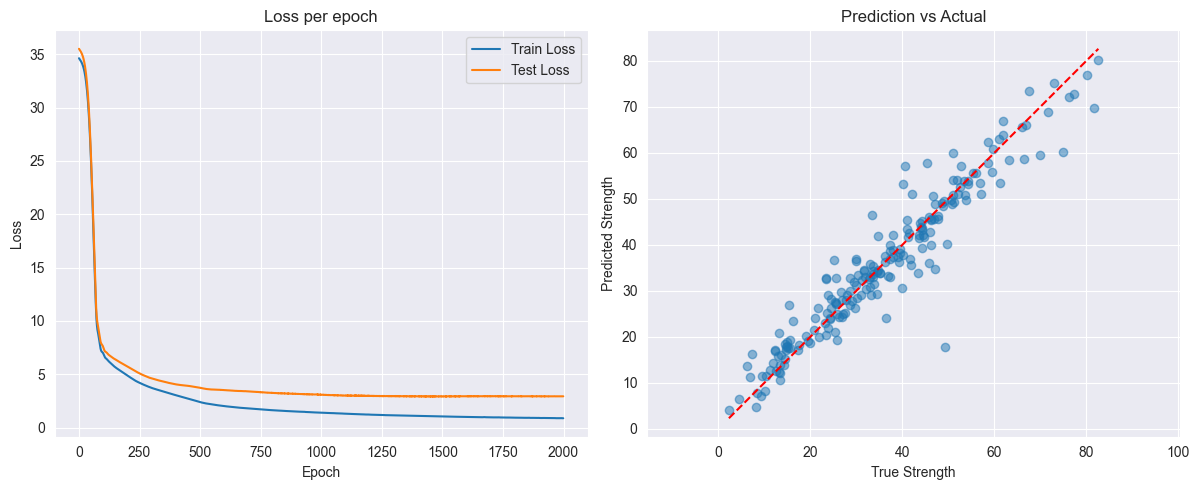

Experiment: [128, 64, 32, 1] + SGD + MSELoss
R2 Score: 0.899


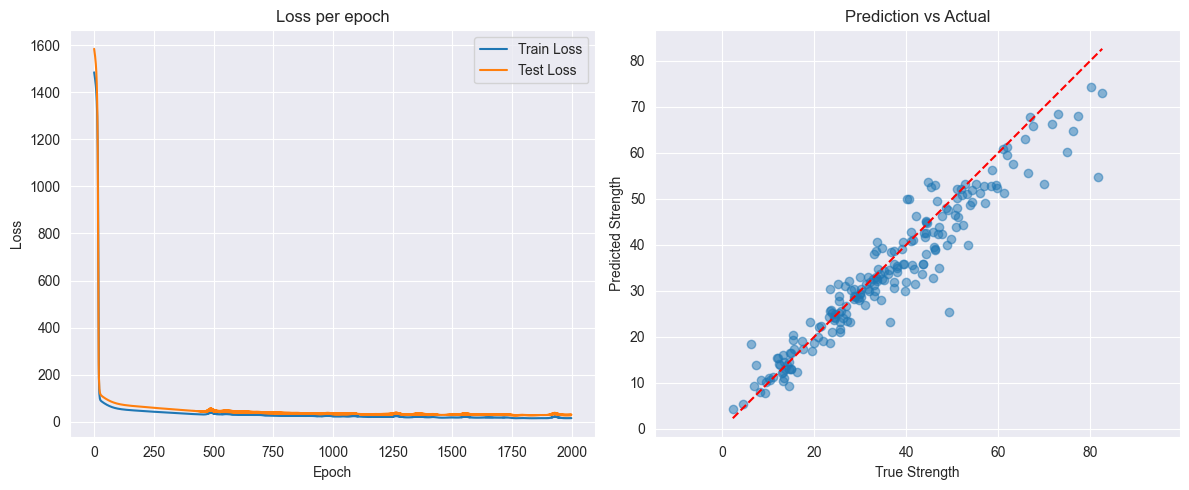

Experiment: [128, 64, 32, 1] + SGD + SmoothL1Loss
R2 Score: 0.675


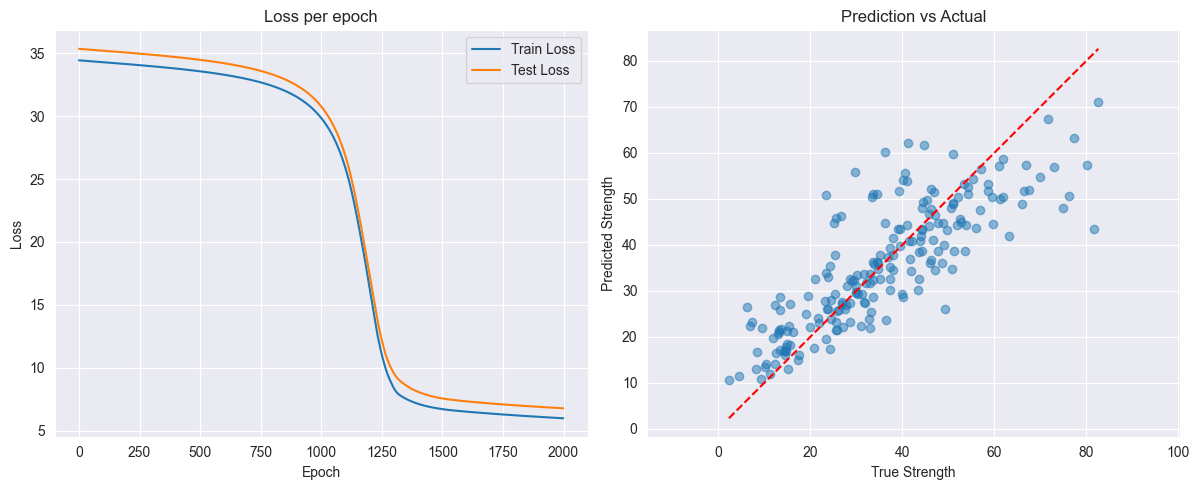

Layers: [64, 1] | Activations: ['ReLU', None] | Optimizer: Adam | Loss: MSELoss | MSE: 137.1726 | MAE: 9.6677 | R2: 0.5402 | R2-train: 0.5949
Layers: [64, 1] | Activations: ['ReLU', None] | Optimizer: Adam | Loss: SmoothL1Loss | MSE: 104.4184 | MAE: 7.8671 | R2: 0.6500 | R2-train: 0.6964
Layers: [64, 1] | Activations: ['ReLU', None] | Optimizer: SGD | Loss: MSELoss | MSE: 56.2696 | MAE: 5.6463 | R2: 0.8114 | R2-train: 0.8434
Layers: [64, 1] | Activations: ['ReLU', None] | Optimizer: SGD | Loss: SmoothL1Loss | MSE: 400.9286 | MAE: 15.4542 | R2: -0.3439 | R2-train: -0.2672
Layers: [32, 16, 1] | Activations: ['ReLU', 'ReLU', None] | Optimizer: Adam | Loss: MSELoss | MSE: 50.0780 | MAE: 5.2615 | R2: 0.8321 | R2-train: 0.8773
Layers: [32, 16, 1] | Activations: ['ReLU', 'ReLU', None] | Optimizer: Adam | Loss: SmoothL1Loss | MSE: 40.6557 | MAE: 4.3573 | R2: 0.8637 | R2-train: 0.9128
Layers: [32, 16, 1] | Activations: ['ReLU', 'ReLU', None] | Optimizer: SGD | Loss: MSELoss | MSE: 42.0487 | MAE

In [18]:

layer_configs = [
    ([64, 1], [nn.ReLU(), None]),
    ([32, 16, 1], [nn.ReLU(), nn.ReLU(), None]),
    ([32, 16, 1], [nn.Tanh(), nn.ReLU(), None]),
    ([64, 32, 1], [nn.ReLU(), nn.ReLU(), None]),
    ([64, 32, 1], [nn.Tanh(), nn.ReLU(), None]),
    ([128, 64, 32, 1], [nn.Tanh(), nn.ReLU(), nn.ReLU(), None])
]
# Шари та активації (мають бути в парі)

# Оптимізатори
optimizers = [torch.optim.Adam, torch.optim.SGD]

# Функції втрат
loss_functions = [nn.MSELoss, nn.SmoothL1Loss]

# Генерація експериментів
experiment_grid = []

for layers, acts in layer_configs:
    for opt in optimizers:
        for loss_fn in loss_functions:
            experiment_grid.append({
                "layers": layers,
                "acts": acts,
                "opt": opt,
                "loss": loss_fn
            })

results = []
for cfg in experiment_grid:
    print(f"Experiment: {cfg['layers']} + {cfg['opt'].__name__} + {cfg['loss'].__name__}")
    res = run_experiment(
        input_size=X_train.shape[1],
        layer_sizes=cfg["layers"],
        activations=cfg["acts"],
        optimizer_class=cfg["opt"],
        loss_fn_class=cfg["loss"],
        num_epochs=2000
    )
    results.append(res)

for res in results:
    print(
        f"Layers: {res['layers']} | "
        f"Activations: {res['activations']} | "
        f"Optimizer: {res['optimizer']} | "
        f"Loss: {res['loss_fn']} | "
        f"MSE: {res['mse']:.4f} | "
        f"MAE: {res['mae']:.4f} | "
        f"R2: {res['r2']:.4f} | "
        f"R2-train: {res['train_r2']:.4f}"
    )

### Висновок з експериментів ConcreteStrengthNN

* Найкращі результати досягнуті з моделлю [128, 64, 32, 1] + Adam + MSELoss або SmoothL1Loss:
- * R²: 0.9134
- * R²-train: 0.9783
- * MAE: 3.42
- * MSE: 25.8492

* Функція втрат SmoothL1Loss працює не гірше (а іноді краще), ніж MSELoss, особливо в глибших мережах
* SGD із SmoothL1Loss часто провалюється: наприклад, R²: 0.3641, MAE: 10.74 у випадку [32, 16, 1]
* Моделі з лише одним шаром (наприклад [64, 1]) значно гірші: R²: 0.54–0.81 навіть з оптимальними умовами
* Додавання шару Tanh перед ReLU дає мʼяке покращення, але не кардинальне

---
**Спостереження:**
* Я спробував також додати нові фічі, однак додавання фіч не дало покращення, а використання one-hot-encoded ознак, навпаки значно погіршило модель.